## **Tech4Good: la sequera a la ciutat de Barcelona**

In [ ]:
%pip install geopandas
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Indicador de gradación del nivel de vegetación**

In [ ]:
geo_data_2017 = geopandas.read_file("/content/drive/MyDrive/hackaton/2017_vegetacio.gpkg")

In [ ]:
geo_data_2017

,PercNDVINo,geometry
0,-0.068700,"MULTIPOLYGON (((431304.850 4580691.507, 431258..."
1,0.147311,"MULTIPOLYGON (((431050.990 4581133.590, 431058..."
2,-0.365556,"MULTIPOLYGON (((430889.560 4580894.594, 430884..."
3,0.050366,"MULTIPOLYGON (((430641.998 4581019.632, 430649..."
4,-0.590935,"MULTIPOLYGON (((430938.474 4581297.493, 430945..."
...,...,...
1056,1.599350,"MULTIPOLYGON (((433606.582 4585978.796, 433559..."
1057,1.934771,"MULTIPOLYGON (((433832.353 4586030.956, 433761..."
1058,1.946578,"MULTIPOLYGON (((433954.665 4585735.271, 433849..."
1059,1.052017,"MULTIPOLYGON (((434056.839 4585935.552, 434071..."


In [ ]:
geo_data_2017.describe()

,PercNDVINo
count,1.061000e+03
mean,3.429869e-08
std,1.000472e+00
min,-1.228358e+00
25%,-6.151372e-01
50%,-2.567563e-01
75%,2.790515e-01
max,5.927189e+00


<Figure size 1500x1500 with 0 Axes>

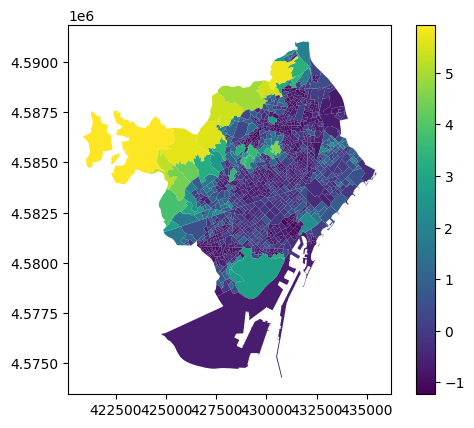

In [ ]:
plt.figure(figsize=(15, 15))
geo_data_2017.plot(column="PercNDVINo",legend=True,cmap='viridis')
plt.show()

### **Indicador de vulnerabilidad por falta de espacios verdes y exposición al calor**

In [ ]:
geo_data_2015 = geopandas.read_file("/content/drive/MyDrive/hackaton/2015_vulnera_faltaverd.gpkg")

In [ ]:
geo_data_2015

,ndviOn,geometry
0,4,"MULTIPOLYGON (((431304.850 4580691.507, 431258..."
1,4,"MULTIPOLYGON (((431050.990 4581133.590, 431058..."
2,5,"MULTIPOLYGON (((430889.560 4580894.594, 430884..."
3,5,"MULTIPOLYGON (((430641.998 4581019.632, 430649..."
4,6,"MULTIPOLYGON (((430938.474 4581297.493, 430945..."
...,...,...
1056,4,"MULTIPOLYGON (((433606.582 4585978.796, 433559..."
1057,4,"MULTIPOLYGON (((433832.353 4586030.956, 433761..."
1058,4,"MULTIPOLYGON (((433954.665 4585735.271, 433849..."
1059,4,"MULTIPOLYGON (((434056.839 4585935.552, 434071..."


<Figure size 1500x1500 with 0 Axes>

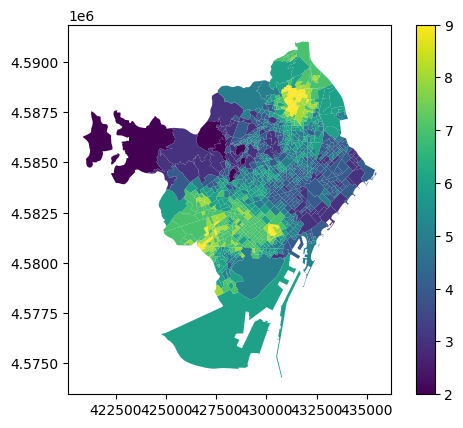

In [ ]:
plt.figure(figsize=(15, 15))
geo_data_2015.plot(column="ndviOn",legend=True,cmap='viridis')
plt.show()

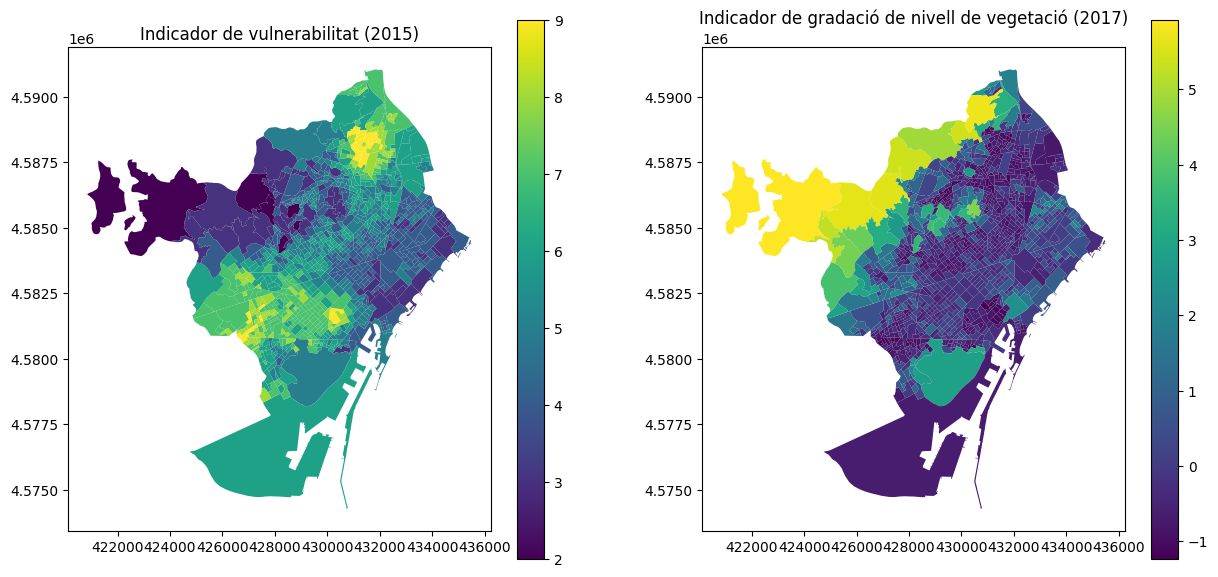

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

geo_data_2015.plot(column='ndviOn', cmap="viridis", legend=True, ax=ax1)
geo_data_2017.plot(column='PercNDVINo', cmap="viridis", legend=True, ax=ax2)
ax1.set_title("Indicador de vulnerabilitat (2015)")
ax2.set_title("Indicador de gradació de nivell de vegetació (2017)")
plt.show()

Podemos observar que las zonas más vulnerables corresponden en gran parte a aquellas que tienen menos zonas con vegetación.

Creamos una tabla a partir de un diccionario con los jardines verticales de Barcelona junto con su distrito.

In [ ]:
jardines = [
    {"Nombre": "Jardín Vertical Tarradellas", "Distrito": "Eixample"},
    {"Nombre": "Jardín Vertical del Calaix de Sants", "Distrito": "Sants-Montjuïc"},
    {"Nombre": "Jardín Vertical del Centre Cívic Joan Oliver", "Distrito": "Les Corts"},
    {"Nombre": "Bosque vertical de Montjuïc", "Distrito": "Sants-Montjuïc"},
    {"Nombre": "Jardín Vertical del Palacio del Marqués de Alfarràs", "Distrito": "Horta-Guinardó"},
    {"Nombre": "Jardín Vertical del Pont de Sarajevo", "Distrito": "Nou Barris"},
    {"Nombre": "Jardín Vertical de la Plaza de las Mujeres del 36", "Distrito": "Gràcia"},
    {"Nombre": "Jardín Vertical del Edificio Media-TIC", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical de la Torre Espiral", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Imagina", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Hotel Ibis Styles Barcelona City Bogatell", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Utopicus", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Mercat de Sant Antoni", "Distrito": "Eixample"},
    {"Nombre": "Jardín Vertical de la Biblioteca de Catalunya", "Distrito": "Ciutat Vella"},
    {"Nombre": "Jardín Vertical de la Estación de Autobuses Barcelona Nord", "Distrito": "Sant Andreu"},
    {"Nombre": "Jardín Vertical del Museo de Historia de Barcelona (MUHBA)", "Distrito": "Ciutat Vella"},
    {"Nombre": "Jardín Vertical del Hospital de Sant Pau", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical de la Estación de Francia", "Distrito": "Ciutat Vella"},
    {"Nombre": "Jardín Vertical del Edificio Tibidabo", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical de la Estación de Metro Liceu", "Distrito": "Ciutat Vella"},
    {"Nombre": "Jardín Vertical del Edificio Imagina B", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical de la Fundación Joan Miró", "Distrito": "Sants-Montjuïc"},
    {"Nombre": "Jardín Vertical del Edificio Diagonal 640", "Distrito": "Les Corts"},
    {"Nombre": "Jardín Vertical del Edificio Balmes 108", "Distrito": "Gràcia"},
    {"Nombre": "Jardín Vertical del Edificio La Pedrera", "Distrito": "Gràcia"},
    {"Nombre": "Jardín Vertical del Edificio Farinera Teixidor", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Almogàvers Business Factory", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Esade Creapolis", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Meliá Barcelona Sky", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Alvento", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Rainieri III", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Mónaco", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio U232 Hotel", "Distrito": "Eixample"},
    {"Nombre": "Jardín Vertical del Edificio Motor Village", "Distrito": "Sant Martí"},
    {"Nombre": "Jardín Vertical del Edificio Catalonia Square", "Distrito": "Eixample"}
]

jardin_vert = pd.DataFrame(jardines)
jardin_vert.sort_values(by="Distrito", inplace=True)
jardin_vert.reset_index(drop=True, inplace=True)
jardin_vert

,Nombre,Distrito
0,Jardín Vertical de la Estación de Francia,Ciutat Vella
1,Jardín Vertical de la Estación de Metro Liceu,Ciutat Vella
2,Jardín Vertical del Museo de Historia de Barce...,Ciutat Vella
3,Jardín Vertical de la Biblioteca de Catalunya,Ciutat Vella
4,Jardín Vertical del Edificio U232 Hotel,Eixample
5,Jardín Vertical del Mercat de Sant Antoni,Eixample
6,Jardín Vertical Tarradellas,Eixample
7,Jardín Vertical del Edificio Catalonia Square,Eixample
8,Jardín Vertical del Edificio La Pedrera,Gràcia
9,Jardín Vertical de la Plaza de las Mujeres del 36,Gràcia


Hacemos un recuento de los jardines por distritos.

In [ ]:
jardin_vert['Distrito'].value_counts()


Sant Martí        16
Ciutat Vella       4
Eixample           4
Gràcia             3
Sants-Montjuïc     3
Les Corts          2
Horta-Guinardó     1
Nou Barris         1
Sant Andreu        1
Name: Distrito, dtype: int64

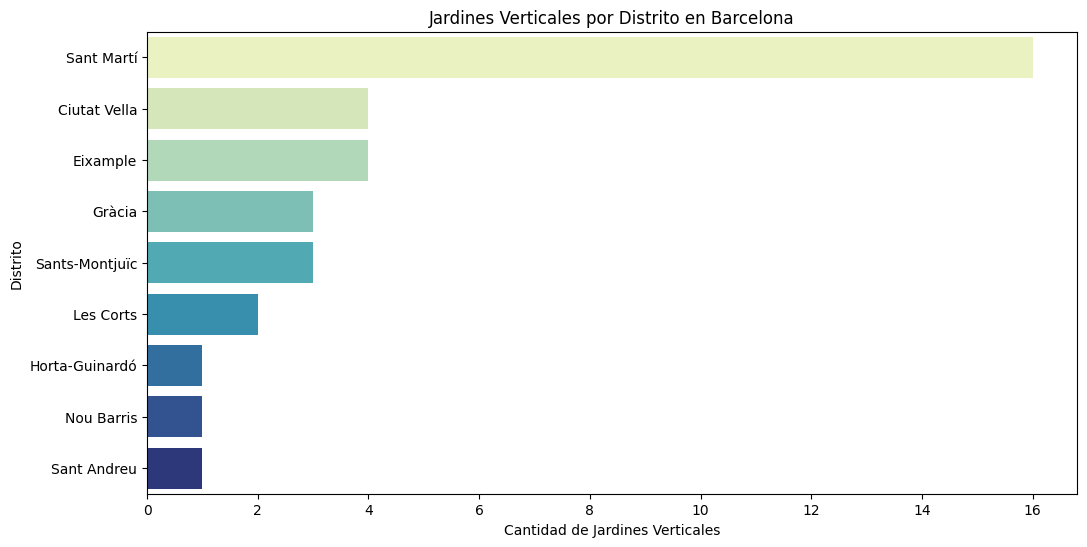

In [ ]:
conteo_distritos = jardin_vert['Distrito'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(data=jardin_vert, y='Distrito', order=conteo_distritos.index, palette='YlGnBu')
plt.xlabel('Cantidad de Jardines Verticales')
plt.ylabel('Distrito')
plt.title('Jardines Verticales por Distrito en Barcelona')
plt.show()

Vemos que el distrito que más jardines verticales tiene, en concreto 16, es el de Sant Martí, muy por encima del resto.

Añadimos ahora las coordenadas para poder crear mapas y visualizar los jardines.

In [ ]:
jardines = [
    {"Nombre": "Jardín Vertical Tarradellas", "Distrito": "Eixample", "Coordenadas":(41.392280, 2.163218) },
    {"Nombre": "Jardín Vertical del Calaix de Sants", "Distrito": "Sants-Montjuïc", "Coordenadas":(41.363062, 2.155247)},
    {"Nombre": "Jardín Vertical del Centre Cívic Joan Oliver", "Distrito": "Les Corts", "Coordenadas":(41.388439, 2.117901)},
    {"Nombre": "Bosque vertical de Montjuïc", "Distrito": "Sants-Montjuïc", "Coordenadas":(41.363062, 2.155247)},
    {"Nombre": "Jardín Vertical del Palacio del Marqués de Alfarràs", "Distrito": "Horta-Guinardó", "Coordenadas":(41.433954, 2.146738)},
    {"Nombre": "Jardín Vertical del Pont de Sarajevo", "Distrito": "Nou Barris", "Coordenadas":(41.441631, 2.177238)},
    {"Nombre": "Jardín Vertical de la Plaza de las Mujeres del 36", "Distrito": "Gràcia", "Coordenadas":(41.398686, 2.153461)},
    {"Nombre": "Jardín Vertical del Edificio Media-TIC", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical de la Torre Espiral", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Imagina", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Hotel Ibis Styles Barcelona City Bogatell", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Utopicus", "Distrito": "Sant Martí","Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Mercat de Sant Antoni", "Distrito": "Eixample", "Coordenadas":(41.392280, 2.163218)},
    {"Nombre": "Jardín Vertical de la Biblioteca de Catalunya", "Distrito": "Ciutat Vella", "Coordenadas":(41.379518, 2.168368)},
    {"Nombre": "Jardín Vertical de la Estación de Autobuses Barcelona Nord", "Distrito": "Sant Andreu", "Coordenadas":(41.434152, 2.186315)},
    {"Nombre": "Jardín Vertical del Museo de Historia de Barcelona (MUHBA)", "Distrito": "Ciutat Vella", "Coordenadas":(41.379518, 2.168368)},
    {"Nombre": "Jardín Vertical del Hospital de Sant Pau", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical de la Estación de Francia", "Distrito": "Ciutat Vella", "Coordenadas":(41.379518, 2.168368)},
    {"Nombre": "Jardín Vertical del Edificio Tibidabo", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical de la Estación de Metro Liceu", "Distrito": "Ciutat Vella", "Coordenadas":(41.379518, 2.168368)},
    {"Nombre": "Jardín Vertical del Edificio Imagina B", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical de la Fundación Joan Miró", "Distrito": "Sants-Montjuïc", "Coordenadas":(41.363062, 2.155247)},
    {"Nombre": "Jardín Vertical del Edificio Diagonal 640", "Distrito": "Les Corts", "Coordenadas":(41.388439, 2.117901)},
    {"Nombre": "Jardín Vertical del Edificio Balmes 108", "Distrito": "Gràcia", "Coordenadas":(41.398686, 2.153461)},
    {"Nombre": "Jardín Vertical del Edificio La Pedrera", "Distrito": "Gràcia", "Coordenadas":(41.398686, 2.153461)},
    {"Nombre": "Jardín Vertical del Edificio Farinera Teixidor", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Almogàvers Business Factory", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Esade Creapolis", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Meliá Barcelona Sky", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Alvento", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Rainieri III", "Distrito": "Sant Martí","Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Mónaco", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio U232 Hotel", "Distrito": "Eixample", "Coordenadas":(41.392280, 2.163218)},
    {"Nombre": "Jardín Vertical del Edificio Motor Village", "Distrito": "Sant Martí", "Coordenadas":(41.408383, 2.199638)},
    {"Nombre": "Jardín Vertical del Edificio Catalonia Square", "Distrito": "Eixample", "Coordenadas":(41.392280, 2.163218)}
]

jardin_vert = pd.DataFrame(jardines)
jardin_vert.sort_values(by="Distrito", inplace=True)
jardin_vert.reset_index(drop=True, inplace=True)
jardin_vert

,Nombre,Distrito,Coordenadas
0,Jardín Vertical de la Estación de Francia,Ciutat Vella,"(41.379518, 2.168368)"
1,Jardín Vertical de la Estación de Metro Liceu,Ciutat Vella,"(41.379518, 2.168368)"
2,Jardín Vertical del Museo de Historia de Barce...,Ciutat Vella,"(41.379518, 2.168368)"
3,Jardín Vertical de la Biblioteca de Catalunya,Ciutat Vella,"(41.379518, 2.168368)"
4,Jardín Vertical del Edificio U232 Hotel,Eixample,"(41.39228, 2.163218)"
5,Jardín Vertical del Mercat de Sant Antoni,Eixample,"(41.39228, 2.163218)"
6,Jardín Vertical Tarradellas,Eixample,"(41.39228, 2.163218)"
7,Jardín Vertical del Edificio Catalonia Square,Eixample,"(41.39228, 2.163218)"
8,Jardín Vertical del Edificio La Pedrera,Gràcia,"(41.398686, 2.153461)"
9,Jardín Vertical de la Plaza de las Mujeres del 36,Gràcia,"(41.398686, 2.153461)"


In [ ]:
import folium
from itertools import cycle

# Crear un mapa centrado en Barcelona
mapa = folium.Map(location=[41.3887901, 2.1589899], zoom_start=12)

# Calcular el número de jardines por distrito
jardines_por_distrito = jardin_vert['Distrito'].value_counts()

# Asignar colores a los distritos de manera cíclica
colores = cycle(['green', 'blue', 'red', 'orange', 'purple', 'gray'])

# Iterar sobre los distritos y agregar marcadores al mapa
for distrito, count in jardines_por_distrito.items():
    coordenadas = jardin_vert.loc[jardin_vert['Distrito'] == distrito, 'Coordenadas'].values[0]
    folium.Marker(
        location=coordenadas,
        icon=folium.Icon(color=next(colores), icon='leaf'),
        popup=f"{distrito}: {count} jardines"
    ).add_to(mapa)

# Mostrar el mapa
mapa

Aquí vemos los distritos en los que hay jardines verticales marcados con una hoja.

In [ ]:
jardin_vert['count'] = jardin_vert.groupby('Distrito')['Distrito'].transform('count')
jardin_vert

,Nombre,Distrito,Coordenadas,count
0,Jardín Vertical de la Estación de Francia,Ciutat Vella,"(41.379518, 2.168368)",4
1,Jardín Vertical de la Estación de Metro Liceu,Ciutat Vella,"(41.379518, 2.168368)",4
2,Jardín Vertical del Museo de Historia de Barce...,Ciutat Vella,"(41.379518, 2.168368)",4
3,Jardín Vertical de la Biblioteca de Catalunya,Ciutat Vella,"(41.379518, 2.168368)",4
4,Jardín Vertical del Edificio U232 Hotel,Eixample,"(41.39228, 2.163218)",4
5,Jardín Vertical del Mercat de Sant Antoni,Eixample,"(41.39228, 2.163218)",4
6,Jardín Vertical Tarradellas,Eixample,"(41.39228, 2.163218)",4
7,Jardín Vertical del Edificio Catalonia Square,Eixample,"(41.39228, 2.163218)",4
8,Jardín Vertical del Edificio La Pedrera,Gràcia,"(41.398686, 2.153461)",3
9,Jardín Vertical de la Plaza de las Mujeres del 36,Gràcia,"(41.398686, 2.153461)",3


In [ ]:
import folium
from itertools import cycle

# Crear un mapa centrado en Barcelona
BCN_map = folium.Map(location=[41.3887901, 2.1589899], zoom_start=12)

# Añadimos el link de Json

BCNGeo = 'https://raw.githubusercontent.com/martgnz/bcn-geodata/master/districtes/districtes.geojson'

# Construimos el mapa

folium.Choropleth(geo_data = BCNGeo,
                  name = 'choropleth',
                  data = jardin_vert,
                  columns = ['Distrito','count'],
                  key_on = 'feature.properties.NOM',
                  fill_color = 'YlGn',
                  fill_opacity = 0.7,
                  line_opacity = 0.4,
                  legend_name = 'Jardines verticales en Barcelona').add_to(BCN_map)

BCN_map

Aquí, en cambio, podemos visualizar en verde los distritos con más jardines i la falta de jardines verticales en la zona de Sarrià-Sant Gervasi.

Análisis precipitaciones y temperaturas en

A continuación importamos el dataset de "Precipitacions Barcelona Des De 1786" y "Temperatures mitjanes mensuals de l’aire de la ciutat de Barcelona des de 1780", ambos de OpenData del Ayuntamiento de Barcelona. Previamente los juntamos en un archivo de csv y nos quedamos con las columnas "Any", "Mes", "Precipitacions" i "Temperatura mediana".

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [ ]:
# actualizamos los datos de lluvia y temperatura
df = pd.read_csv("/content/drive/MyDrive/hackaton/data_barcelona.csv")
df.head()

,Any,Mes,Desc_Mes,Precipitacions,Temperatura mediana
0,1786,1,Gener,32.8,7.8
1,1786,2,Febrer,28.4,8.3
2,1786,3,Març,84.4,9.9
3,1786,4,Abril,42.3,12.8
4,1786,5,Maig,8.5,16.8


In [ ]:
df.describe()

,year,month,Precipitacions,Temperatura mediana
count,2844.000000,2844.00000,2844.000000,2844.000000
mean,1904.000000,6.50000,49.220886,14.593530
std,68.427429,3.45266,45.226096,5.529662
min,1786.000000,1.00000,0.000000,2.500000
25%,1845.000000,3.75000,16.500000,9.700000
50%,1904.000000,6.50000,37.400000,14.000000
75%,1963.000000,9.25000,68.725000,19.700000
max,2022.000000,12.00000,365.800000,28.500000


In [ ]:
# renombramos las columnas
df=df.rename(columns = {'Any':'year'})
df=df.rename(columns = {'Mes':'month'})
df

,year,month,Desc_Mes,Precipitacions,Temperatura mediana
0,1786,1,Gener,32.8,7.8
1,1786,2,Febrer,28.4,8.3
2,1786,3,Març,84.4,9.9
3,1786,4,Abril,42.3,12.8
4,1786,5,Maig,8.5,16.8
...,...,...,...,...,...
2839,2022,8,Agost,67.9,27.2
2840,2022,9,Setembre,13.1,22.5
2841,2022,10,Octubre,11.3,20.7
2842,2022,11,Novembre,7.6,15.2


In [ ]:
# Creamos columna con el formato date
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,year,month,Desc_Mes,Precipitacions,Temperatura mediana,date
0,1786,1,Gener,32.8,7.8,1786-01-01
1,1786,2,Febrer,28.4,8.3,1786-02-01
2,1786,3,Març,84.4,9.9,1786-03-01
3,1786,4,Abril,42.3,12.8,1786-04-01
4,1786,5,Maig,8.5,16.8,1786-05-01
...,...,...,...,...,...,...
2839,2022,8,Agost,67.9,27.2,2022-08-01
2840,2022,9,Setembre,13.1,22.5,2022-09-01
2841,2022,10,Octubre,11.3,20.7,2022-10-01
2842,2022,11,Novembre,7.6,15.2,2022-11-01


In [ ]:
# eliminamos columnas innecesarias
df = df.drop(['Desc_Mes', 'year','month'], axis =1)
df.head()

,Precipitacions,Temperatura mediana,date
0,32.8,7.8,1786-01-01
1,28.4,8.3,1786-02-01
2,84.4,9.9,1786-03-01
3,42.3,12.8,1786-04-01
4,8.5,16.8,1786-05-01


In [ ]:
df.dtypes

Precipitacions                float64
Temperatura mediana           float64
date                   datetime64[ns]
dtype: object

In [ ]:
# buscamos elementos nulos
na_sum = df[:].isnull().sum()
print(na_sum)

Precipitacions         0
Temperatura mediana    0
date                   0
dtype: int64


In [ ]:
# miramos si hay duplicados
df_clean = df.drop_duplicates()
if len(df_clean) == len(df):
    print("No duplicate elements")
else:
    print("there are duplicate items")

No duplicate elements


In [ ]:
df.shape

(2844, 3)

In [ ]:
# creamos un nuevo dataframe entre el 2015 y el 2022, para el index de vegetación
mask = (df['date'] >= '1950-01-01') & (df['date'] <= '2022-12-12')

df_1950_2022 = df.loc[mask]

df_1950_2022.head()

,Precipitacions,Temperatura mediana,date
1968,7.3,8.4,1950-01-01
1969,4.8,10.1,1950-02-01
1970,91.5,11.4,1950-03-01
1971,66.8,11.5,1950-04-01
1972,47.1,16.6,1950-05-01


<Axes: xlabel='date', ylabel='Temperatura mediana'>

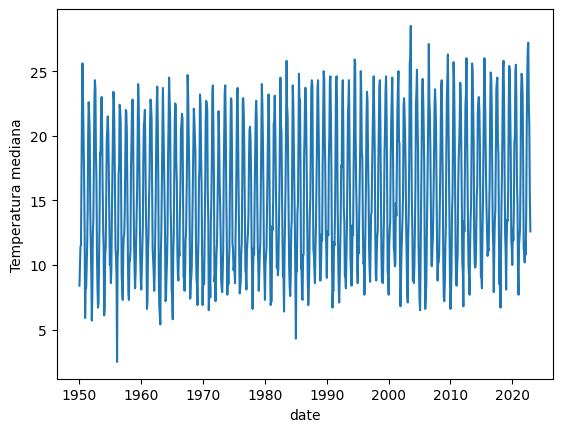

In [ ]:
# plot de temperatura
sns.lineplot(x = 'date',
             y = "Temperatura mediana",
             data = df_1950_2022)

<Axes: xlabel='date', ylabel='Precipitacions'>

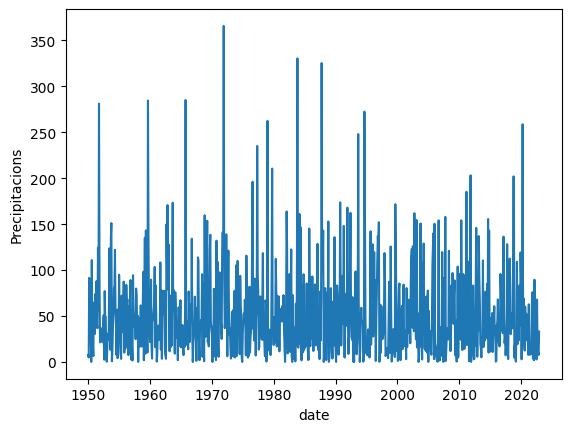

In [ ]:
#plot de lluvias
sns.lineplot(x = "date",
             y = "Precipitacions",
             data = df_1950_2022)


En el primer gráfico, de temperaturas podemos observar estacionalidad. En el de lluvias también vemos estacionalidad y bastante variabilidad con algunos cambios bruscos y lluvias fuertes. Si lo observamos, los picos de lluvias fuertes disminuyen al acercarse a la actualidad.